# OCR for Handwritten Forms

In [1]:
# Select image to extract text from
original_image = 'images/image_1.jpg'

### Image Preprocessing

In [2]:
# Import OpenCV library
import cv2

# Load the image
image = cv2.imread(original_image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Save the processed image (optional)
processed_image = 'processed_images/processed_image_1.jpg'
cv2.imwrite(processed_image, thresh)

True

### Extract Text using EasyOCR library

In [3]:
# Import EasyOCR library
import easyocr

# Initialize reader object
reader = easyocr.Reader(['en'])

# Extract text from original image
result = reader.readtext(original_image, detail=0)

# Join the extracted text into a single string
extracted_text = '\n'.join(result)

# Check output
print(extracted_text)

# Save the extracted text to a file
output_text = 'output_text/easyocr_output_text_1.txt'
with open(output_text, 'w') as file:
    file.write(extracted_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\kkoma\Documents\GitHub\nlp_handwritten_forms\myenv\lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

HANDWRITING SAMPLE FORM
DATE
CITY
STATE
2IP
8-3-89
Vipay LIX
1u
888sz
This gample of
handwriting
collected for Lec
computer
recognition of hand printed numbers
and letters _
Please print thbe following characters in tbe boxes that appear below.
0L23466189
0123456 7 8 9
0 1
234567 8.9
2123451222
2123456782
0/239s778
701
3752
80259
960841
701
375 ?
Sez5? 
9b094 [
4588
32123
832856
[S9
4586
32123
832652
7481
80539
4192419
904
2481
Fes39
4[9219
964
61738
729858
390
5718
613&
2297
396
LZ/e
109324
825
434
46002
[0933 4
625
4234
46002
ELxlake dubtiLum"gienhes_
2XXLA KPdebLULLEw filen hoce
2XS BNGECMYWATKFL U0 HPIR V DJ 4
ZXSBLGECmYWGTKfLUoHP irv PJA
Pkeasc print thc folloming text in the box below:
the People o thc United States,
in order to iorm
mare
perfect Union_
establish Justice,
Inrute
domestic
Tranquility, provide for the
common
Delenbe
promota the general Welfare,
and sccure the Blessings of Liberty to
oureelvee and our poeterity, do ordain and establieh this CONSTITUTION for the Unit

### Tokenize output

In [4]:
# Import SpaCy library
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

# Read the saved text file
with open(output_text, 'r') as file:
    text = file.read()

# Tokenize using spaCy
doc = nlp(text)
tokens = [token.text for token in doc]

print(tokens)

['HANDWRITING', 'SAMPLE', 'FORM', '\n', 'DATE', '\n', 'CITY', '\n', 'STATE', '\n', '2IP', '\n', '8', '-', '3', '-', '89', '\n', 'Vipay', 'LIX', '\n', '1u', '\n', '888sz', '\n', 'This', 'gample', 'of', '\n', 'handwriting', '\n', 'collected', 'for', 'Lec', '\n', 'computer', '\n', 'recognition', 'of', 'hand', 'printed', 'numbers', '\n', 'and', 'letters', '_', '\n', 'Please', 'print', 'thbe', 'following', 'characters', 'in', 'tbe', 'boxes', 'that', 'appear', 'below', '.', '\n', '0L23466189', '\n', '0123456', '7', '8', '9', '\n', '0', '1', '\n', '234567', '8.9', '\n', '2123451222', '\n', '2123456782', '\n', '0/239s778', '\n', '701', '\n', '3752', '\n', '80259', '\n', '960841', '\n', '701', '\n', '375', '?', '\n', 'Sez5', '?', '\n', '9b094', '[', '\n', '4588', '\n', '32123', '\n', '832856', '\n', '[', 'S9', '\n', '4586', '\n', '32123', '\n', '832652', '\n', '7481', '\n', '80539', '\n', '4192419', '\n', '904', '\n', '2481', '\n', 'Fes39', '\n', '4[9219', '\n', '964', '\n', '61738', '\n', '729

### Extract text using Tesseract library

In [5]:
import pytesseract
from PIL import Image

# Open the image
img = Image.open(original_image)

custom_config = r'--psm 11'

# Extract text with the specified page segmentation mode
extracted_text = pytesseract.image_to_string(img, config=custom_config)

# Print the extracted text
print(extracted_text)

# Save the extracted text to a file
output_text = 'output_text/tesseract_output_text_1.txt'

with open(output_text, 'w') as file:
    file.write(extracted_text)

HANDWRITING SAMPLE FORM

DATE.

ory

STATE ZIP

as

3-59

Vawwew LY fate KEFSE

‘This sample of handwriting is being collected for use in testing computer recognition of hand printed numbers

and letters, Please print the following characters in the boxes that appear below.

9123456789

0123456789

0123456789

OLA3YSO7E 7

0/23 SO7E7

[

OAP3YEEC7E,

3152

80759

960041

[ezs2

[ie257

L9e09¥7

33128

£526 EF

#2

rz [este]

419219,

2Y¢EL

F053)

419 BS

2

Bee

$1738 _

779658

5.

300

5716

238

OG 6 SE

EZ

STE

[ie

100334,

ai

£25.

4234

46002

LOBBY

Zo

G25

BIE

Y6002

gyxlakpdebtsirummfqjenhocy

Gy Xba N fd sbfuruimwlF tenhocer

ZXSBNGECMYWQTKFLUOHPIRVDJA

XSBUGECMYWRTKFLYOHP/RV DIA

Please print the following text in the box below:

We, the People of the United States, in order to form a more perfect Union, establish Justice, insure domestic

‘Tranquility, provide for the common Defense, promote the general Welfare, and secure the Blessings of Liberty to

ourselves and ou

### Region-based Extraction using Contour Detection

In [6]:
# Load the image
image = cv2.imread(original_image)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Use OpenCV to detect contours (boxes/fields in the form)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours to extract text from specific regions
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Crop the region of interest (ROI)
    roi = image[y:y+h, x:x+w]
    
    # Convert the ROI to a PIL image for Tesseract
    roi_pil = Image.fromarray(roi)

    # Use Tesseract with appropriate PSM
    custom_config = r'--psm 11'
    text = pytesseract.image_to_string(roi_pil, config=custom_config)

    # Print or save extracted text from each ROI
    print(text)

HANDWRITING SAMPLE FORM.

DATE.

oury

STATE ZIP

ee

3-59

Vapvew CY fae KEFYSE

‘This sample of handwriting is being collected for use in testing computer recognition of hand printed numbers

and letters, Please print the following characters in the boxes that appear below.

9123456789

0123456789

0123456789

Ol23YSO7E 7

O12 3S Sb7EP

[

O12 3 Sb 7E,

3152

80759

960041

tA

L960 ¥/

4586

[ezs2 7 Lae2e

832656,

Bai83

SF265F

22

a

(a)

419219,

2YEL

G0S39

419 BS

2

a

729658

5

300

5716

mE

x

2G 6 SE

EZ

ERLLA

[ie

100334,

rai

4234

46002,

LOBBY

%) [E25

BIE

46002

gyxlakpdebtsirumwfajenhocy

Gy kha N fd Sbfzrumwle lenhorer

ZXSBNGECMYWQTKFLUOHPIRVDJA

XSBUGECMYWRTKFLYOHP/RV DIA

Please print the following text in the box below:

We, the People of the United States, in order to form a more perfect Union, establish Justice, insure domestic

‘Tranquility, provide for the common Defense, promote the general Welfare, and secure the Blessings of Liberty to

ourselves 

### Region-based Extraction + True Label Mapping

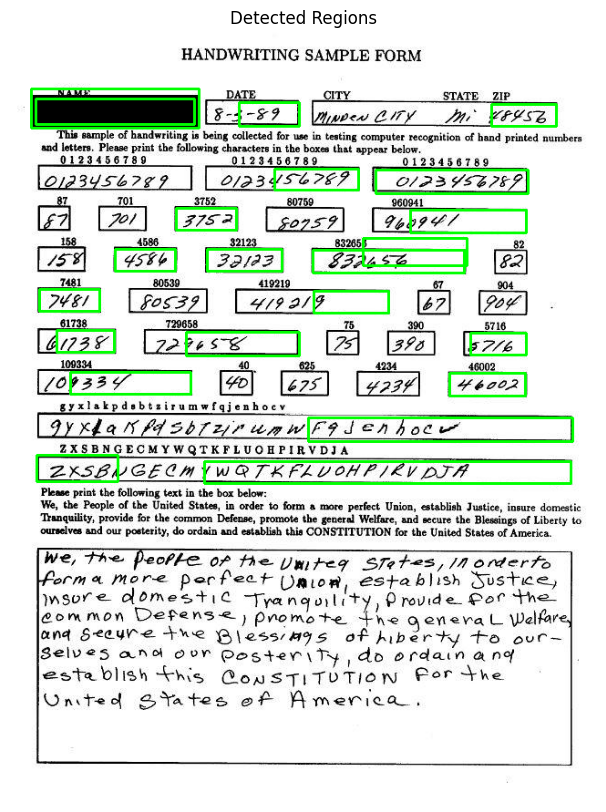

{'Date': 'GSBY', 'City': '2Z2xsSBI', 'State': 'YWQRATKFLLYOHP/RV PIA', 'ZIP': '22/A2'}


In [13]:
import matplotlib.pyplot as plt

# Load the form image
image = cv2.imread(original_image)

# Convert to grayscale for better thresholding
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to enhance the detection of black boxes
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Detect edges to find the contours of the form boxes
edges = cv2.Canny(thresh, 30, 150)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a list of labels corresponding to the form fields (manually)
field_labels = ["Date", "City", "State", "ZIP"]

# Initialize a dictionary to hold the extracted text and the associated labels
extracted_data = {}

# Sort contours by their position (optional, depends on the form structure)
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])  # Sort by the y-coordinate of each contour

# Loop through each contour and filter by size (exclude very large and very small contours)
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out contours that are too large or too small to be boxes
    if w < 50 or h < 20 or w > 500 or h > 200:  # Adjust these values based on your form's structure
        continue

    # Crop the region of interest (ROI) from the image
    roi = image[y:y+h, x:x+w]
    
    # Convert the ROI to a PIL image for Tesseract
    roi_pil = Image.fromarray(roi)
    
    # Use Tesseract to extract text from the ROI
    custom_config = r'--psm 11'
    extracted_text = pytesseract.image_to_string(roi_pil, config=custom_config)
    
    # Clean up the extracted text (optional)
    extracted_text = extracted_text.strip()

    # Map the extracted text to the corresponding label (assuming the contours align with the labels)
    label = field_labels[i % len(field_labels)]  # Avoid out-of-range errors
    extracted_data[label] = extracted_text

    # Optional: Draw the bounding box on the image for debugging
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Function to display the image using Matplotlib
def show_image(img, title="Image"):
    # Convert BGR (used by OpenCV) to RGB (used by Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

# Show the final image with detected regions (boxes)
show_image(image, "Detected Regions")

# Print the extracted data (you can also save this to a text file)
print(extracted_data)